In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import binom, chisquare

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

mpl.rcParams['figure.dpi'] = 300

In [2]:
lengths = {
    "Chrom_1": 18146847,
    "Chrom_2": 16274841,
    "Chrom_3": 20354777,
    "Chrom_4": 15224634,
    "Chrom_5": 16930519,
    "Chrom_6": 13893210,
}

In [3]:
events = {
    "30H_C36_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C48_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C3_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C3_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C13_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C38_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C38_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C52_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C27_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C9_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C9_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C40_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C8_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C8_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C30_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C30_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C8_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C8_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(12.7, 13.0, 'DEL')]} ,
    "P250_C17_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C17_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P500_C18_E3" : {'Chrom_1': [(7.0, 7.4, 'DEL'), (9.3, 9.4, 'LOH')], 'Chrom_2': [(6.3, 6.5, 'DEL')], 'Chrom_3': [(7.8, 8.0, 'DEL'), (13.0, 13.2, 'DEL')], 'Chrom_4': [(3.0, 3.4, 'DEL'), (4.8, 5.0, 'DEL')], 'Chrom_5': [], 'Chrom_6': [(3.8, 4.2, 'DEL'), (13.0, 14.0, 'DEL')]} ,
    "P500_C30_E3" : {'Chrom_1': [(8.7, 9.0, 'DEL')], 'Chrom_2': [(7.5, 8.0, 'DEL'), (9.0, 9.2, 'LOH')], 'Chrom_3': [(2.0, 6.0, 'DUP'), (15.0, 15.3, 'DEL')], 'Chrom_4': [], 'Chrom_5': [(15.0, 15.5, 'DEL')], 'Chrom_6': []} ,
    "P500_C16_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P500_C16_E4" : {'Chrom_1': [(2.419, 2.467, 'LOH')], 'Chrom_2': [], 'Chrom_3': [(6.3, 8.2, 'DUP')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H2B4" : {'Chrom_1': [(15.3, 16.0, 'DEL'), (16.1, 16.4, 'DUP')], 'Chrom_2': [], 'Chrom_3': [(0.0, 1.8, 'DUP'), (6.0, 6.4, 'LOH'), (10.9, 11.3, 'LOH')], 'Chrom_4': [(0.0, 1.0, 'DEL'), (10.25, 10.65, 'LOH'), (11.0, 11.6, 'LOH')], 'Chrom_5': [], 'Chrom_6': [(1.8, 2.15, 'LOH')]} ,
    "H2B4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3A4" : {'Chrom_1': [(16.3, 18.0, 'HDE')], 'Chrom_2': [], 'Chrom_3': [(3.35, 3.9, 'LOH'), (4.4, 4.9, 'LOH')], 'Chrom_4': [(0.0, 0.35, 'LOH')], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3A4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3C4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3C4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H4A4" : {'Chrom_1': [(0.0, 16.0, 'DUP')], 'Chrom_2': [], 'Chrom_3': [(10.95, 12.5, 'LOH')], 'Chrom_4': [(0.0, 0.55, 'HDE'), (6.9, 7.3, 'DUP')], 'Chrom_5': [], 'Chrom_6': [(0.0, 2.0, 'DUP'), (7.6, 8.3, 'DEL')]} ,
    "H4A4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H5A2" : {'Chrom_1': [(4.8, 16.0, 'DUP')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [(15.75, 17.0, 'LOH'), (0.0, 0.75, 'HDE')], 'Chrom_6': [(0.0, 3.4, 'DUP')]},
    "H5A2_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5A4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [(18.5, 19.9, 'DEL')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5A4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5C2" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5C2_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H2A3" : {'Chrom_1': [(16.9, 18.1, 'HDE')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(1.65, 1.95, 'LOH'), (3.2, 3.6, 'LOH')]} ,
    "H2C3" : {'Chrom_1': [(12.8, 13.4, 'LOH')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(2.4, 4.3, 'DEL')]} ,
    "H4C2" : {'Chrom_1': [(11.0, 11.6, 'LOH'), (16.2, 18.2, 'HDE')], 'Chrom_2': [(1.3, 1.9, 'LOH')], 'Chrom_3': [], 'Chrom_4': [(0.19, 0.27,'DEL')], 'Chrom_5': [], 'Chrom_6': []} ,
    "H5A3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [(0, 0.5,'DUP')], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2B3" : {'Chrom_1': [(14.7, 16.0, 'LOH'), (16.0, 18.0, 'RES')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(0.0, 3.1, 'LOH')]} ,
    "D2B3_50G" : {'Chrom_1': [(0.4, 2.7, 'LOH')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2C1" : {'Chrom_1': [(12.5, 16.0, 'DUP')], 'Chrom_2': [], 'Chrom_3': [(17.5, 20.5, 'DUP')], 'Chrom_4': [(0.16, 0.51, 'DEL')], 'Chrom_5': [], 'Chrom_6': [(0.0, 6.0, 'DUP')]} ,
    "D2C1_50G" : {'Chrom_1': [(11.0, 12.0, 'DEL')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2C3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(4.2, 4.9, 'LOH')]} ,
    "D2C3_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D3A3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D3A3_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D4B4" : {'Chrom_1': [(5.4, 5.6, 'LOH'), (5.9, 6.25, 'LOH')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [(0.0, 0.75, 'HDE')], 'Chrom_6': []} ,
    "D4B4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5C1" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5C1_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5C3" : {'Chrom_1': [(10.4, 16.0, 'LOH'), (16.0, 17.0, 'DUP'), (17.0, 18.0, 'HDE')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [(0.0, 0.5, 'LOH')], 'Chrom_5': [], 'Chrom_6': [(0.0, 3.15, 'LOH'), (3.6, 4.0, 'LOH')]} ,
    "D5C3_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2A1" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D3A1" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D4A3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5B3" : {'Chrom_1': [(17.2, 18.3, 'HDE')], 'Chrom_2': [], 'Chrom_3': [(18.5, 19.9, 'DEL')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
}

colors = {
    "LOH":ccycle[0], # LOH
    "DUP":ccycle[2], # Duplication
    "RES":ccycle[6], # Restoration (cov = 1 previously 0.5)
    "DEL":ccycle[1], # Heterozygous deletion
    "HDE":ccycle[3], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}

ancestrally_homozygous = [
    (1, 16.0, 18.3),
    (2, 15.8, 16.3),
    (2, 0.0, 0.3),
    (4, 0.0, 0.25),
    (5, 0.0, 0.5),
    (5, 4.6, 6.6),
    (5, 9.9, 14.5),
    (6, 13.55, 13.9),
]

In [4]:
event_dc = {"sample":[], "exp":[], "chr":[], "start":[], "end":[], "size":[], "type":[]}

for sm, e in events.items() :
    for c in lengths.keys() :
        for region in e[c] :
            exp = "ME" if sm[0] in ["H", "D"] else "GR"
            event_dc["sample"].append(sm)
            event_dc["exp"].append(exp)
            event_dc["chr"].append(c)
            event_dc["start"].append(region[0])
            event_dc["end"].append(region[1])
            event_dc["size"].append(round(region[1]-region[0], 2))
            event_dc["type"].append(region[2])
            
events_df = pd.DataFrame().from_dict(event_dc)
print(events_df.to_csv(sep=",", index=False, header=None))

P250_C8_E4,GR,Chrom_6,12.7,13.0,0.3,DEL
P500_C18_E3,GR,Chrom_1,7.0,7.4,0.4,DEL
P500_C18_E3,GR,Chrom_1,9.3,9.4,0.1,LOH
P500_C18_E3,GR,Chrom_2,6.3,6.5,0.2,DEL
P500_C18_E3,GR,Chrom_3,7.8,8.0,0.2,DEL
P500_C18_E3,GR,Chrom_3,13.0,13.2,0.2,DEL
P500_C18_E3,GR,Chrom_4,3.0,3.4,0.4,DEL
P500_C18_E3,GR,Chrom_4,4.8,5.0,0.2,DEL
P500_C18_E3,GR,Chrom_6,3.8,4.2,0.4,DEL
P500_C18_E3,GR,Chrom_6,13.0,14.0,1.0,DEL
P500_C30_E3,GR,Chrom_1,8.7,9.0,0.3,DEL
P500_C30_E3,GR,Chrom_2,7.5,8.0,0.5,DEL
P500_C30_E3,GR,Chrom_2,9.0,9.2,0.2,LOH
P500_C30_E3,GR,Chrom_3,2.0,6.0,4.0,DUP
P500_C30_E3,GR,Chrom_3,15.0,15.3,0.3,DEL
P500_C30_E3,GR,Chrom_5,15.0,15.5,0.5,DEL
P500_C16_E4,GR,Chrom_1,2.419,2.467,0.05,LOH
P500_C16_E4,GR,Chrom_3,6.3,8.2,1.9,DUP
H2B4,ME,Chrom_1,15.3,16.0,0.7,DEL
H2B4,ME,Chrom_1,16.1,16.4,0.3,DUP
H2B4,ME,Chrom_3,0.0,1.8,1.8,DUP
H2B4,ME,Chrom_3,6.0,6.4,0.4,LOH
H2B4,ME,Chrom_3,10.9,11.3,0.4,LOH
H2B4,ME,Chrom_4,0.0,1.0,1.0,DEL
H2B4,ME,Chrom_4,10.25,10.65,0.4,LOH
H2B4,ME,Chrom_4,11.0,11.6,0.6,LOH
H2B4,ME,Chrom_6,

In [5]:
ME_events_only = events_df.query("exp == 'ME'")
ME_events_only = ME_events_only.loc[~ME_events_only["sample"].str.contains("_50G")]
print("Number of events:", len(ME_events_only))
grouped_by_sample = ME_events_only.groupby("sample").agg({"sample":"count"})
print(grouped_by_sample)
print("Number of samples with 0 events")
print(22-len(grouped_by_sample))
print("Frequency of number of events")
print(grouped_by_sample["sample"].value_counts())

Number of events: 53
        sample
sample        
D2B3         3
D2C1         4
D2C3         1
D4B4         3
D5B3         2
D5C3         6
H2A3         3
H2B4         9
H2C3         2
H3A4         4
H4A4         6
H4C2         4
H5A2         4
H5A3         1
H5A4         1
Number of samples with 0 events
7
Frequency of number of events
sample
4    4
3    3
1    3
2    2
6    2
9    1
Name: count, dtype: int64


### Simulation of independence of events

In [6]:
num_simulations = 10000
total_events = 53
total_samples = 22
# Max num of events per sample = 11 (for avoiding an error in case of an extreme simulation run)

observed_data = [7, 3, 2, 3, 4, 0, 2, 0, 0, 1, 0, 0]

def run_distributions(num_simulations, num_events, num_samples):
    simulation_results = np.zeros((num_simulations, 12))
    
    for sim in range(num_simulations):
        while True :
            distribution = [0] * num_samples
            for _ in range(num_events):
                idx = random.randint(0, num_samples - 1)
                distribution[idx] += 1

            unique, counts = np.unique(distribution, return_counts=True)
            try :
                simulation_results[sim, unique] = counts
                break
            except :
                print(sim, unique)
            
    return simulation_results

simulation_results = run_distributions(num_simulations, total_events, total_samples)
#print(len(simulation_results))
#print(simulation_results[0])
expected_frequencies = np.mean(simulation_results, axis=0)
print(expected_frequencies, "\n", observed_data)

#print("Expected frequencies (simulation N={}):".format(num_simulations), expected_frequencies)
chi2_statistic, p_value = chisquare(observed_data, f_exp=expected_frequencies)
print(chi2_statistic, p_value)
#
#expected_frequencies = [53/22]*10
#print("Expected frequencies (simulation N={}):".format(num_simulations), expected_frequencies)
#chi2_statistic, p_value = chisquare(observed_data, f_exp=expected_frequencies)
#print(chi2_statistic, p_value)

[1.8754e+00 4.7151e+00 5.8206e+00 4.7281e+00 2.8346e+00 1.3179e+00
 4.9360e-01 1.6030e-01 4.3000e-02 1.0400e-02 8.0000e-04 2.0000e-04] 
 [7, 3, 2, 3, 4, 0, 2, 0, 0, 1, 0, 0]
118.52935729366294 3.581545897812623e-20


### Plots

In [7]:
sample_list = [
    "30H_C36_E5",
    "30H_C48_E5",
    "30H_C3_E4",
    "30H_C3_E5",
    "30D_C13_E3",
    "30D_C38_E4",
    "30D_C38_E5",
    "30D_C52_E5",
    "P0_C27_E5",
    "P0_C9_E4",
    "P0_C9_E5",
    "P0_C40_E5",
    "P100_C8_E3",
    "P100_C8_E4",
    "P100_C30_E3",
    "P100_C30_E4",
    "P250_C8_E3",
    "P250_C8_E4",
    "P250_C17_E3",
    "P250_C17_E4",
    "P500_C18_E3",
    "P500_C30_E3",
    "P500_C16_E5",
    "P500_C16_E4",
    "H2A3",
    "H4A4",
    "H5A2",
    "H2B4",
    "H3A4",
    "H3C4",
    "H5A4",
    "H5C2",
    "H2C3",
    "H5A3",
    "H4C2",
    "D4A3",
    "D2B3",
    "D5B3",
    "D3A1",
    "D2A1",
    "D5C3",
    "D2C1",
    "D2C3",
    "D3A3",
    "D4B4",
    "D5C1",
]

print(len(sample_list))

46


In [8]:
def get_pos(chrom_num, lengths, start, end) :
    
    pos = 0
    for i in range(1, chrom_num) :
        pos += lengths["Chrom_{}".format(i)]
    
    return (pos+start, pos+end)

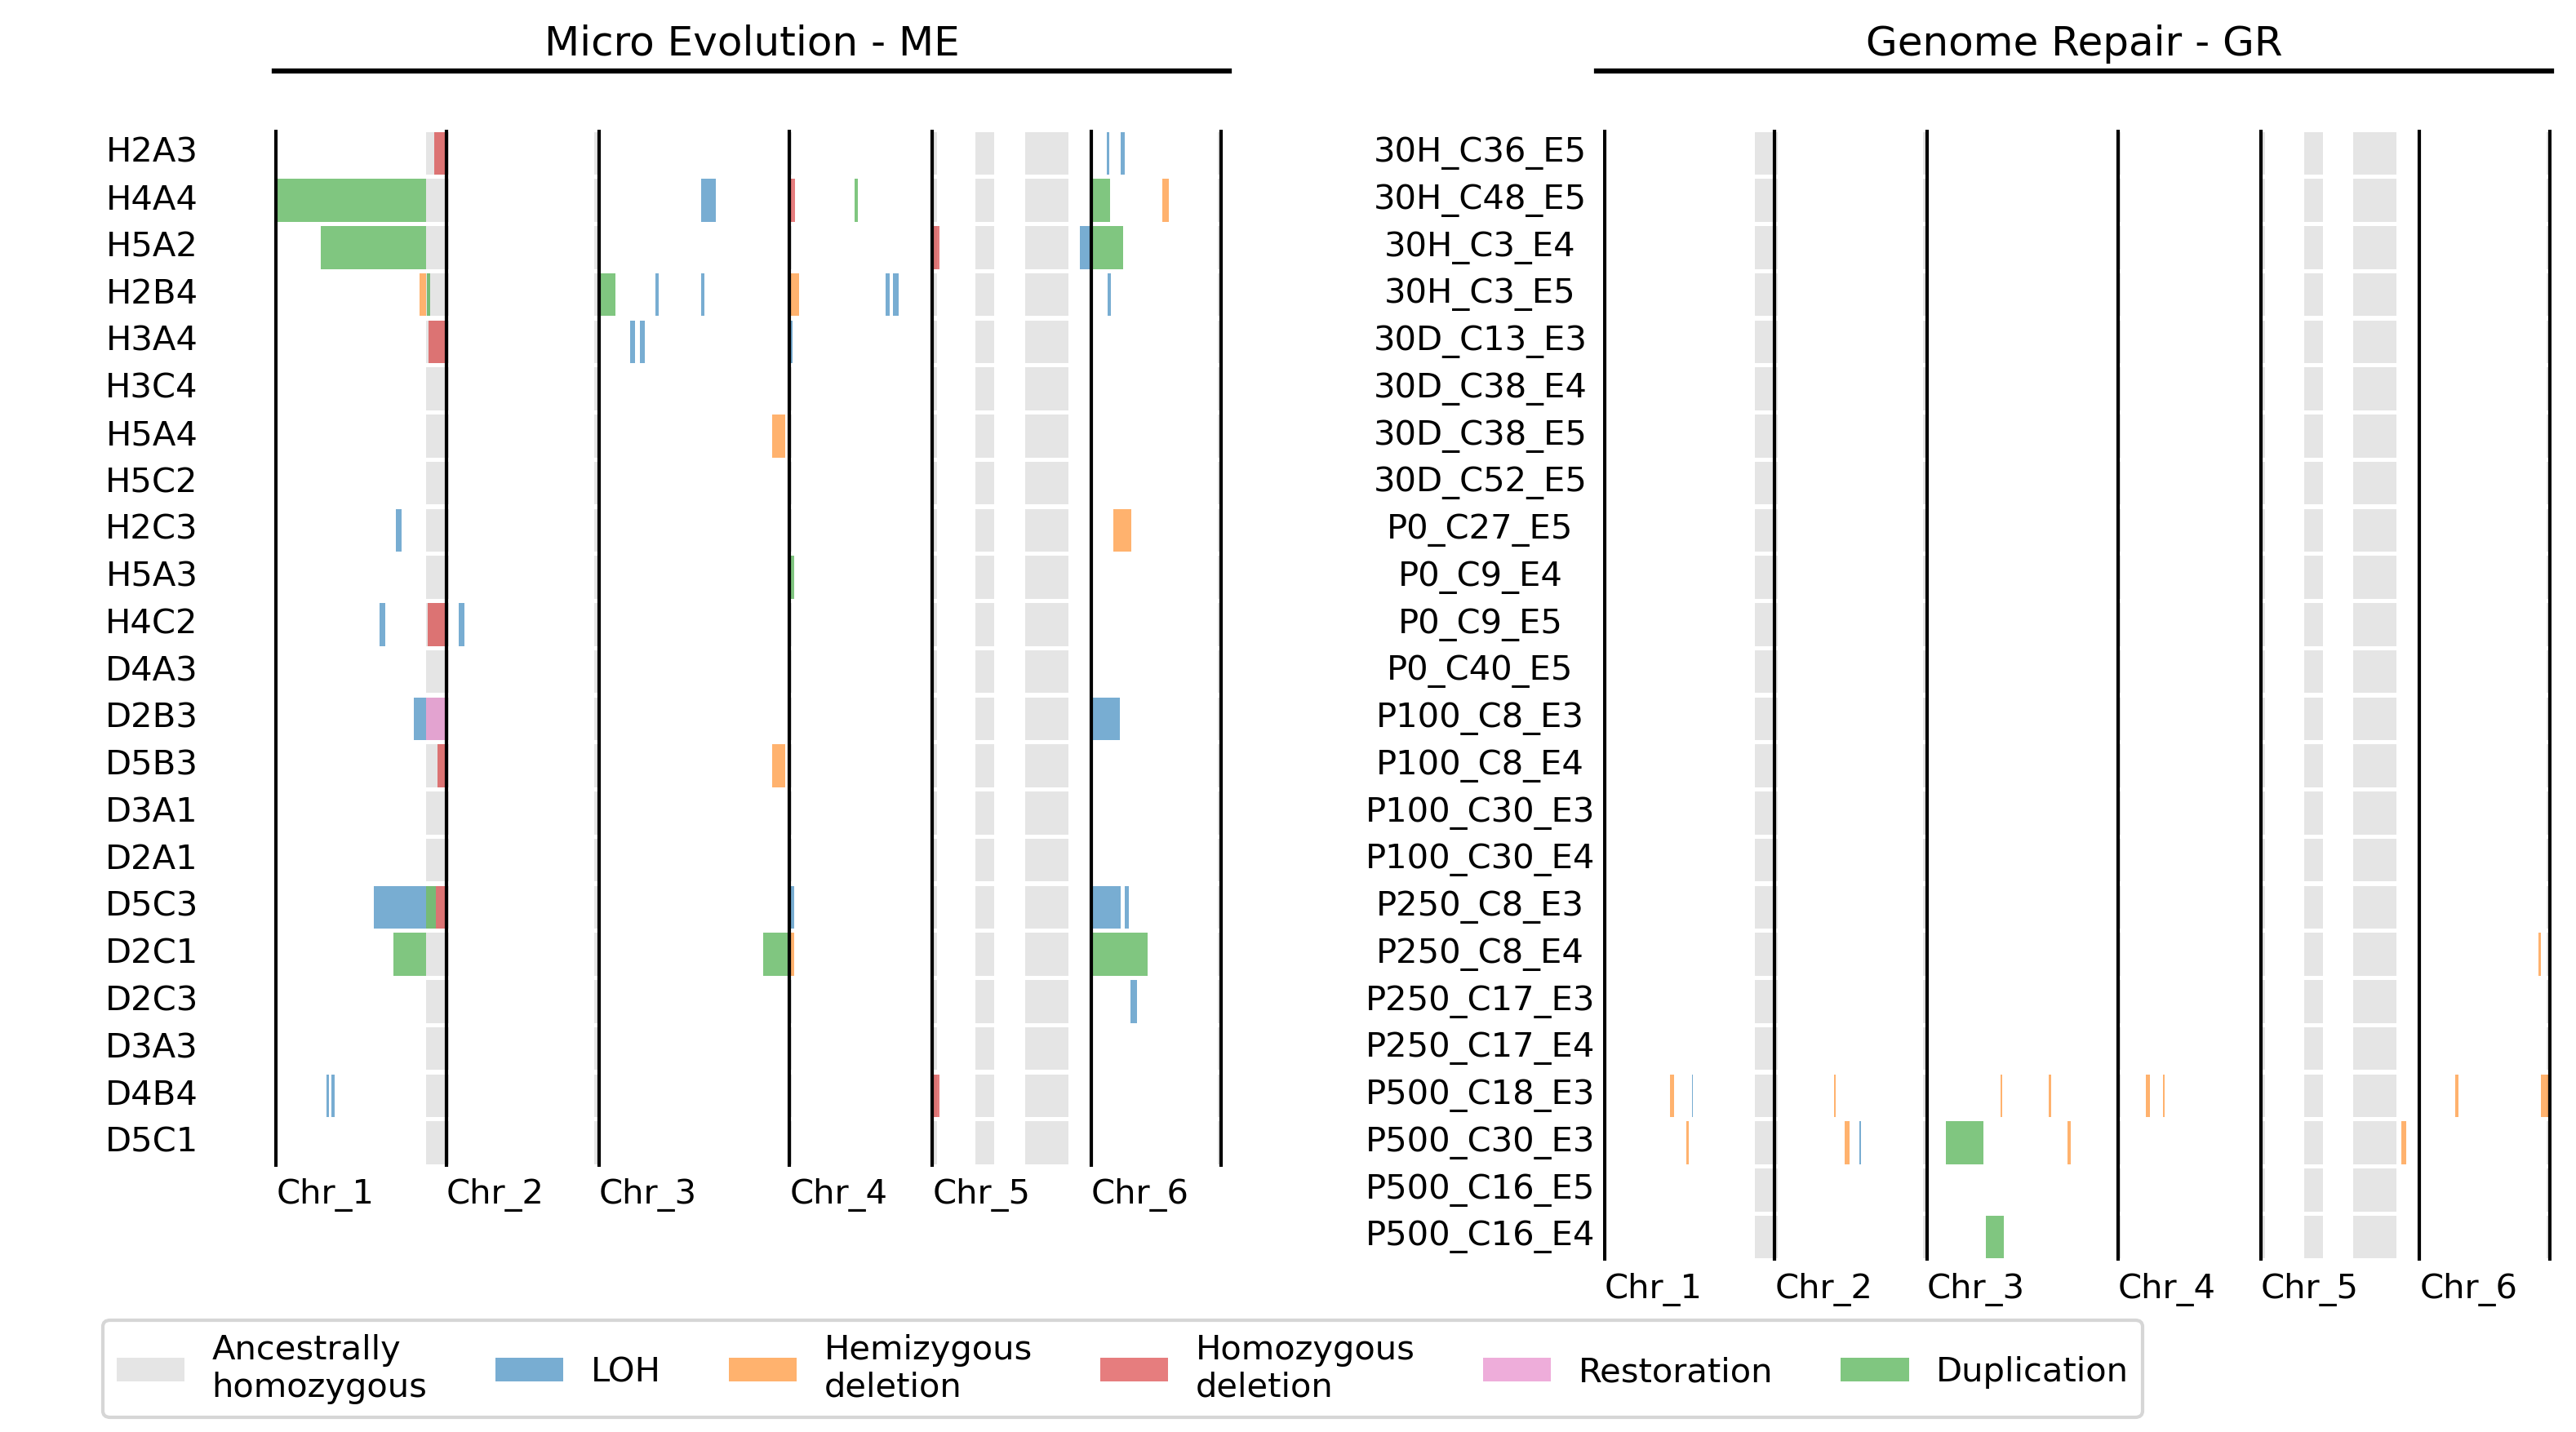

In [9]:
alpha_value = 0.6

total_length = sum([l for k, l in lengths.items()])

fig, axs = plt.subplots(nrows=24, ncols=2, figsize=(12,6))

xticks = []
lsum = 0
for i in range(1, 7) :
    xticks.append(lsum)
    lsum += lengths["Chrom_{}".format(i)]
xticks.append(lsum)

for i in range(24) :
    for j in [1,0] :
        ax = axs[i,j]
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        #if (j == 0 and i < 23) or (j == 1 and i < 21) :
        #    ax.plot([-2e5, total_length+2e5],[-0.035,-0.035], lw=0.5, color="k")
        #    # -0.05 because y-lims are -0.05 to 1.05 and box are 0 to 1
            
        if j == 0 and i >= 22 :
            ax.set_xticks([])
        else :
            ax.set_xticks(xticks)
            ax.set_xticklabels(["" for _ in xticks])
            ax.tick_params(length=0)
            
            for tickpos in xticks :
                ax.plot([tickpos, tickpos], [-0.05,1.05], color="k", lw=1.0, zorder=10)
            #ax.grid(axis="x", lw=1.0, color="k", zorder=10)
            #ax.set_axisbelow(False)
            #[line.set_zorder(-1) for line in ax.lines]
        ax.set_yticks([])
        
        ax.set_xlim(-2e5, total_length+2e5)
        
        anchom = []
        for region in ancestrally_homozygous :
            chrom_num, start, end = region[0], region[1]*1e6, region[2]*1e6
            ns, ne = get_pos(chrom_num, lengths, start, end)
            #print(ns, ne)
            rect = Rectangle((ns, 0), ne-ns, 1, color=(0.0,0.0,0.0,0.05))
            anchom.append(rect)
            
        choms = PatchCollection(anchom, facecolor=(0.0,0.0,0.0,0.1), zorder=1, label="Ancestrally homozygous")
        ax.add_collection(choms)

for i, sm in enumerate(sample_list) :
    
    if sm.startswith("H") or sm.startswith("D") :
        c = 0
        r = i - 24
    else :
        c = 1
        r = i

    ax = axs[r,c]
    
    dels = [] # Heterozygous deletion
    dups = [] # Duplication
    lohs = [] # LOH
    ress = [] # Restoration (cov = 1 previously 0.5)
    hdes = [] # Homozygous deletion

    for chrom, chrom_events in events[sm].items() :
        for e in chrom_events :
            start, end, typ = e[0]*1e6, e[1]*1e6, e[2]
            ns, ne = get_pos(int(chrom[-1]), lengths, start, end)
            rect = Rectangle((ns, 0), ne-ns, 1)
            if typ == "LOH" :
                lohs.append(rect)
            elif typ == "DEL" :
                dels.append(rect)
            elif typ == "DUP" :
                dups.append(rect)
            elif typ == "RES" :
                ress.append(rect)
            elif typ == "HDE" :
                hdes.append(rect)

    clohs = PatchCollection(lohs, facecolor=colors["LOH"], zorder=3, alpha=alpha_value, label="LOH")
    cdels = PatchCollection(dels, facecolor=colors["DEL"], zorder=3, alpha=alpha_value, label="Deletion")
    cdups = PatchCollection(dups, facecolor=colors["DUP"], zorder=3, alpha=alpha_value, label="Duplication")
    cress = PatchCollection(ress, facecolor=colors["RES"], zorder=3, alpha=alpha_value, label="Restoration")
    chdes = PatchCollection(hdes, facecolor=colors["HDE"], zorder=3, alpha=alpha_value, label="Duplication")
    ax.add_collection(clohs)
    ax.add_collection(cdels)
    ax.add_collection(cdups)
    ax.add_collection(cress)
    ax.add_collection(chdes)

    ax.set_ylim(-0.05,1.05)
    ax.set_ylabel(sm, rotation=0.0, labelpad=36, va="center")
        
axs[23,1].set_xticklabels(["Chr_1","Chr_2","Chr_3","Chr_4","Chr_5","Chr_6", ""], fontdict={"horizontalalignment":"left"})
axs[21,0].set_xticklabels(["Chr_1","Chr_2","Chr_3","Chr_4","Chr_5","Chr_6", ""], fontdict={"horizontalalignment":"left"})
axs[22,0].set_visible(False)
axs[23,0].set_visible(False)

legend_elements = [
    Patch(facecolor="black", alpha=0.1, label="Ancestrally\nhomozygous"),
    Patch(facecolor=colors["LOH"], alpha=alpha_value, label="LOH"),
    Patch(facecolor=colors["DEL"], alpha=alpha_value, label="Hemizygous\ndeletion"), # only red is lower alpha to avoid orange being invisible against red background
    Patch(facecolor=colors["HDE"], alpha=alpha_value, label="Homozygous\ndeletion"),
    Patch(facecolor=colors["RES"], alpha=alpha_value, label="Restoration"),
    Patch(facecolor=colors["DUP"], alpha=alpha_value, label="Duplication"),
]

fig.lines.append( Line2D((0.125, 0.45), (0.92, 0.92), color="k", transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.lines.append( Line2D((0.575, 0.90), (0.92, 0.92), color="k", transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.text(x = 0.2875, y = 0.925, s="Micro Evolution - ME", va="bottom", ha="center", fontsize=12)
fig.text(x = 0.7375, y = 0.925, s="Genome Repair - GR", va="bottom", ha="center", fontsize=12)

fig.legend(handles=legend_elements, loc=(0.04,0.01), fontsize=10, ncol=6)

fig.subplots_adjust(wspace=0.4, hspace=0.0)

plt.show()

In [10]:
dc = {"exp":[], "sample":[], "chrom":[], "type":[], "start":[], "end":[]}

for sample, ces in events.items() :
    
    exp = "ME" if sample[0] in ["H", "D"] else "GR"
    
    for chrom, es in ces.items() :
        for e in es :
            dc["exp"].append(exp)
            dc["sample"].append(sample)
            dc["chrom"].append(chrom)
            dc["start"].append(e[0])
            dc["end"].append(e[1])
            dc["type"].append(e[2])
            #print(sample, chrom, )
edf_ = pd.DataFrame().from_dict(dc)
edf_

,exp,sample,chrom,type,start,end
0,GR,P250_C8_E4,Chrom_6,DEL,12.7,13.00
1,GR,P500_C18_E3,Chrom_1,DEL,7.0,7.40
2,GR,P500_C18_E3,Chrom_1,LOH,9.3,9.40
3,GR,P500_C18_E3,Chrom_2,DEL,6.3,6.50
4,GR,P500_C18_E3,Chrom_3,DEL,7.8,8.00
...,...,...,...,...,...,...
68,ME,D5C3,Chrom_4,LOH,0.0,0.50
69,ME,D5C3,Chrom_6,LOH,0.0,3.15
70,ME,D5C3,Chrom_6,LOH,3.6,4.00
71,ME,D5B3,Chrom_1,HDE,17.2,18.30


In [11]:
edf_["type"].value_counts()

type
LOH    28
DEL    22
DUP    14
HDE     8
RES     1
Name: count, dtype: int64

In [12]:
n_ME_events = len( edf_.query("exp == 'ME'") )
n_GR_events = len( edf_.query("exp == 'GR'") )

n_HR_RE_ME = len( edf_.query("exp == 'ME' & type == 'LOH'") )
n_HR_RE_GR = len( edf_.query("exp == 'GR' & type == 'LOH'") )

n_HemDel_ME = len( edf_.query("exp == 'ME' & type == 'DEL'") )
n_HemDel_GR = len( edf_.query("exp == 'GR' & type == 'DEL'") )

n_HomDel_ME = len( edf_.query("exp == 'ME' & type == 'HDE'") )
n_HomDel_GR = len( edf_.query("exp == 'GR' & type == 'HDE'") )

n_Res_ME = len( edf_.query("exp == 'ME' & type == 'RES'") )
n_Res_GR = len( edf_.query("exp == 'GR' & type == 'RES'") )

n_Dup_ME = len( edf_.query("exp == 'ME' & type == 'DUP'") )
n_Dup_GR = len( edf_.query("exp == 'GR' & type == 'DUP'") )

print(
    "ME events:", n_ME_events, "\n",
    "- LOH:", n_HR_RE_ME, "\n",
    "- Hemizygous deletions:", n_HemDel_ME, "\n",
    "- Homozygous deletions:", n_HomDel_ME, "\n",
    "- Restorations:", n_Res_ME, "\n",
    "- Duplications:", n_Dup_ME, "\n",
)
print(
    "GR events:", n_GR_events, "\n",
    "- LOH:", n_HR_RE_GR, "\n",
    "- Hemizygous deletions:", n_HemDel_GR, "\n",
    "- Homozygous deletions:", n_HomDel_GR, "\n",
    "- Restorations:", n_Res_GR, "\n",
    "- Duplications:", n_Dup_GR, "\n",
)

chrs = []
for etype in ["LOH", "DEL", "DUP", "HDE", "RES"] :
    
    per_chrom_ev_count_ME = {ctg:len( edf_.query("exp == 'ME' & type == @etype").query("chrom == @ctg") ) for ctg in lengths.keys()}
    print("ME:", etype)
    for ctg, num in per_chrom_ev_count_ME.items() :
        print(ctg, num)
        
    per_chrom_ev_count_GR = {ctg:len( edf_.query("exp == 'GR' & type == @etype").query("chrom == @ctg") ) for ctg in lengths.keys()}
    print("GR:", etype)
    for ctg, num in per_chrom_ev_count_GR.items() :
        print(ctg, num)

ME events: 55 
 - LOH: 25 
 - Hemizygous deletions: 9 
 - Homozygous deletions: 8 
 - Restorations: 1 
 - Duplications: 12 

GR events: 18 
 - LOH: 3 
 - Hemizygous deletions: 13 
 - Homozygous deletions: 0 
 - Restorations: 0 
 - Duplications: 2 

ME: LOH
Chrom_1 7
Chrom_2 1
Chrom_3 5
Chrom_4 4
Chrom_5 1
Chrom_6 7
GR: LOH
Chrom_1 2
Chrom_2 1
Chrom_3 0
Chrom_4 0
Chrom_5 0
Chrom_6 0
ME: DEL
Chrom_1 2
Chrom_2 0
Chrom_3 2
Chrom_4 3
Chrom_5 0
Chrom_6 2
GR: DEL
Chrom_1 2
Chrom_2 2
Chrom_3 3
Chrom_4 2
Chrom_5 1
Chrom_6 3
ME: DUP
Chrom_1 5
Chrom_2 0
Chrom_3 2
Chrom_4 2
Chrom_5 0
Chrom_6 3
GR: DUP
Chrom_1 0
Chrom_2 0
Chrom_3 2
Chrom_4 0
Chrom_5 0
Chrom_6 0
ME: HDE
Chrom_1 5
Chrom_2 0
Chrom_3 0
Chrom_4 1
Chrom_5 2
Chrom_6 0
GR: HDE
Chrom_1 0
Chrom_2 0
Chrom_3 0
Chrom_4 0
Chrom_5 0
Chrom_6 0
ME: RES
Chrom_1 1
Chrom_2 0
Chrom_3 0
Chrom_4 0
Chrom_5 0
Chrom_6 0
GR: RES
Chrom_1 0
Chrom_2 0
Chrom_3 0
Chrom_4 0
Chrom_5 0
Chrom_6 0


In [24]:
sample_list = [
    "H2B4",
    "H3A4",
    "H3C4",
    "H4A4",
    "H5A2",
    "H5A4",
    "H5C2",
    "H2A3",
    "H2C3",
    "H4C2",
    "H5A3",

    "D2B3",
    "D2C1",
    "D2C3",
    "D3A3",
    "D4B4",
    "D5C1",
    "D5C3",
    "D2A1",
    "D3A1",
    "D4A3",
    "D5B3",
    
    "P250_C8_E3",
    "P250_C8_E4",
    "P250_C17_E3",
    "P250_C17_E4",
    "P500_C16_E4",
    "P500_C16_E5",
    "P500_C18_E3",
    "P500_C30_E3",
]

print(len(sample_list))

event_labels = {
    "LOH": "L",
    "DEL": "Δ",
    "DUP": "D",
    "RES": "R",
    "HDE": "H",
}

30


In [73]:
from matplotlib.artist import Artist
from matplotlib.transforms import Bbox
from matplotlib.offsetbox import DrawingArea

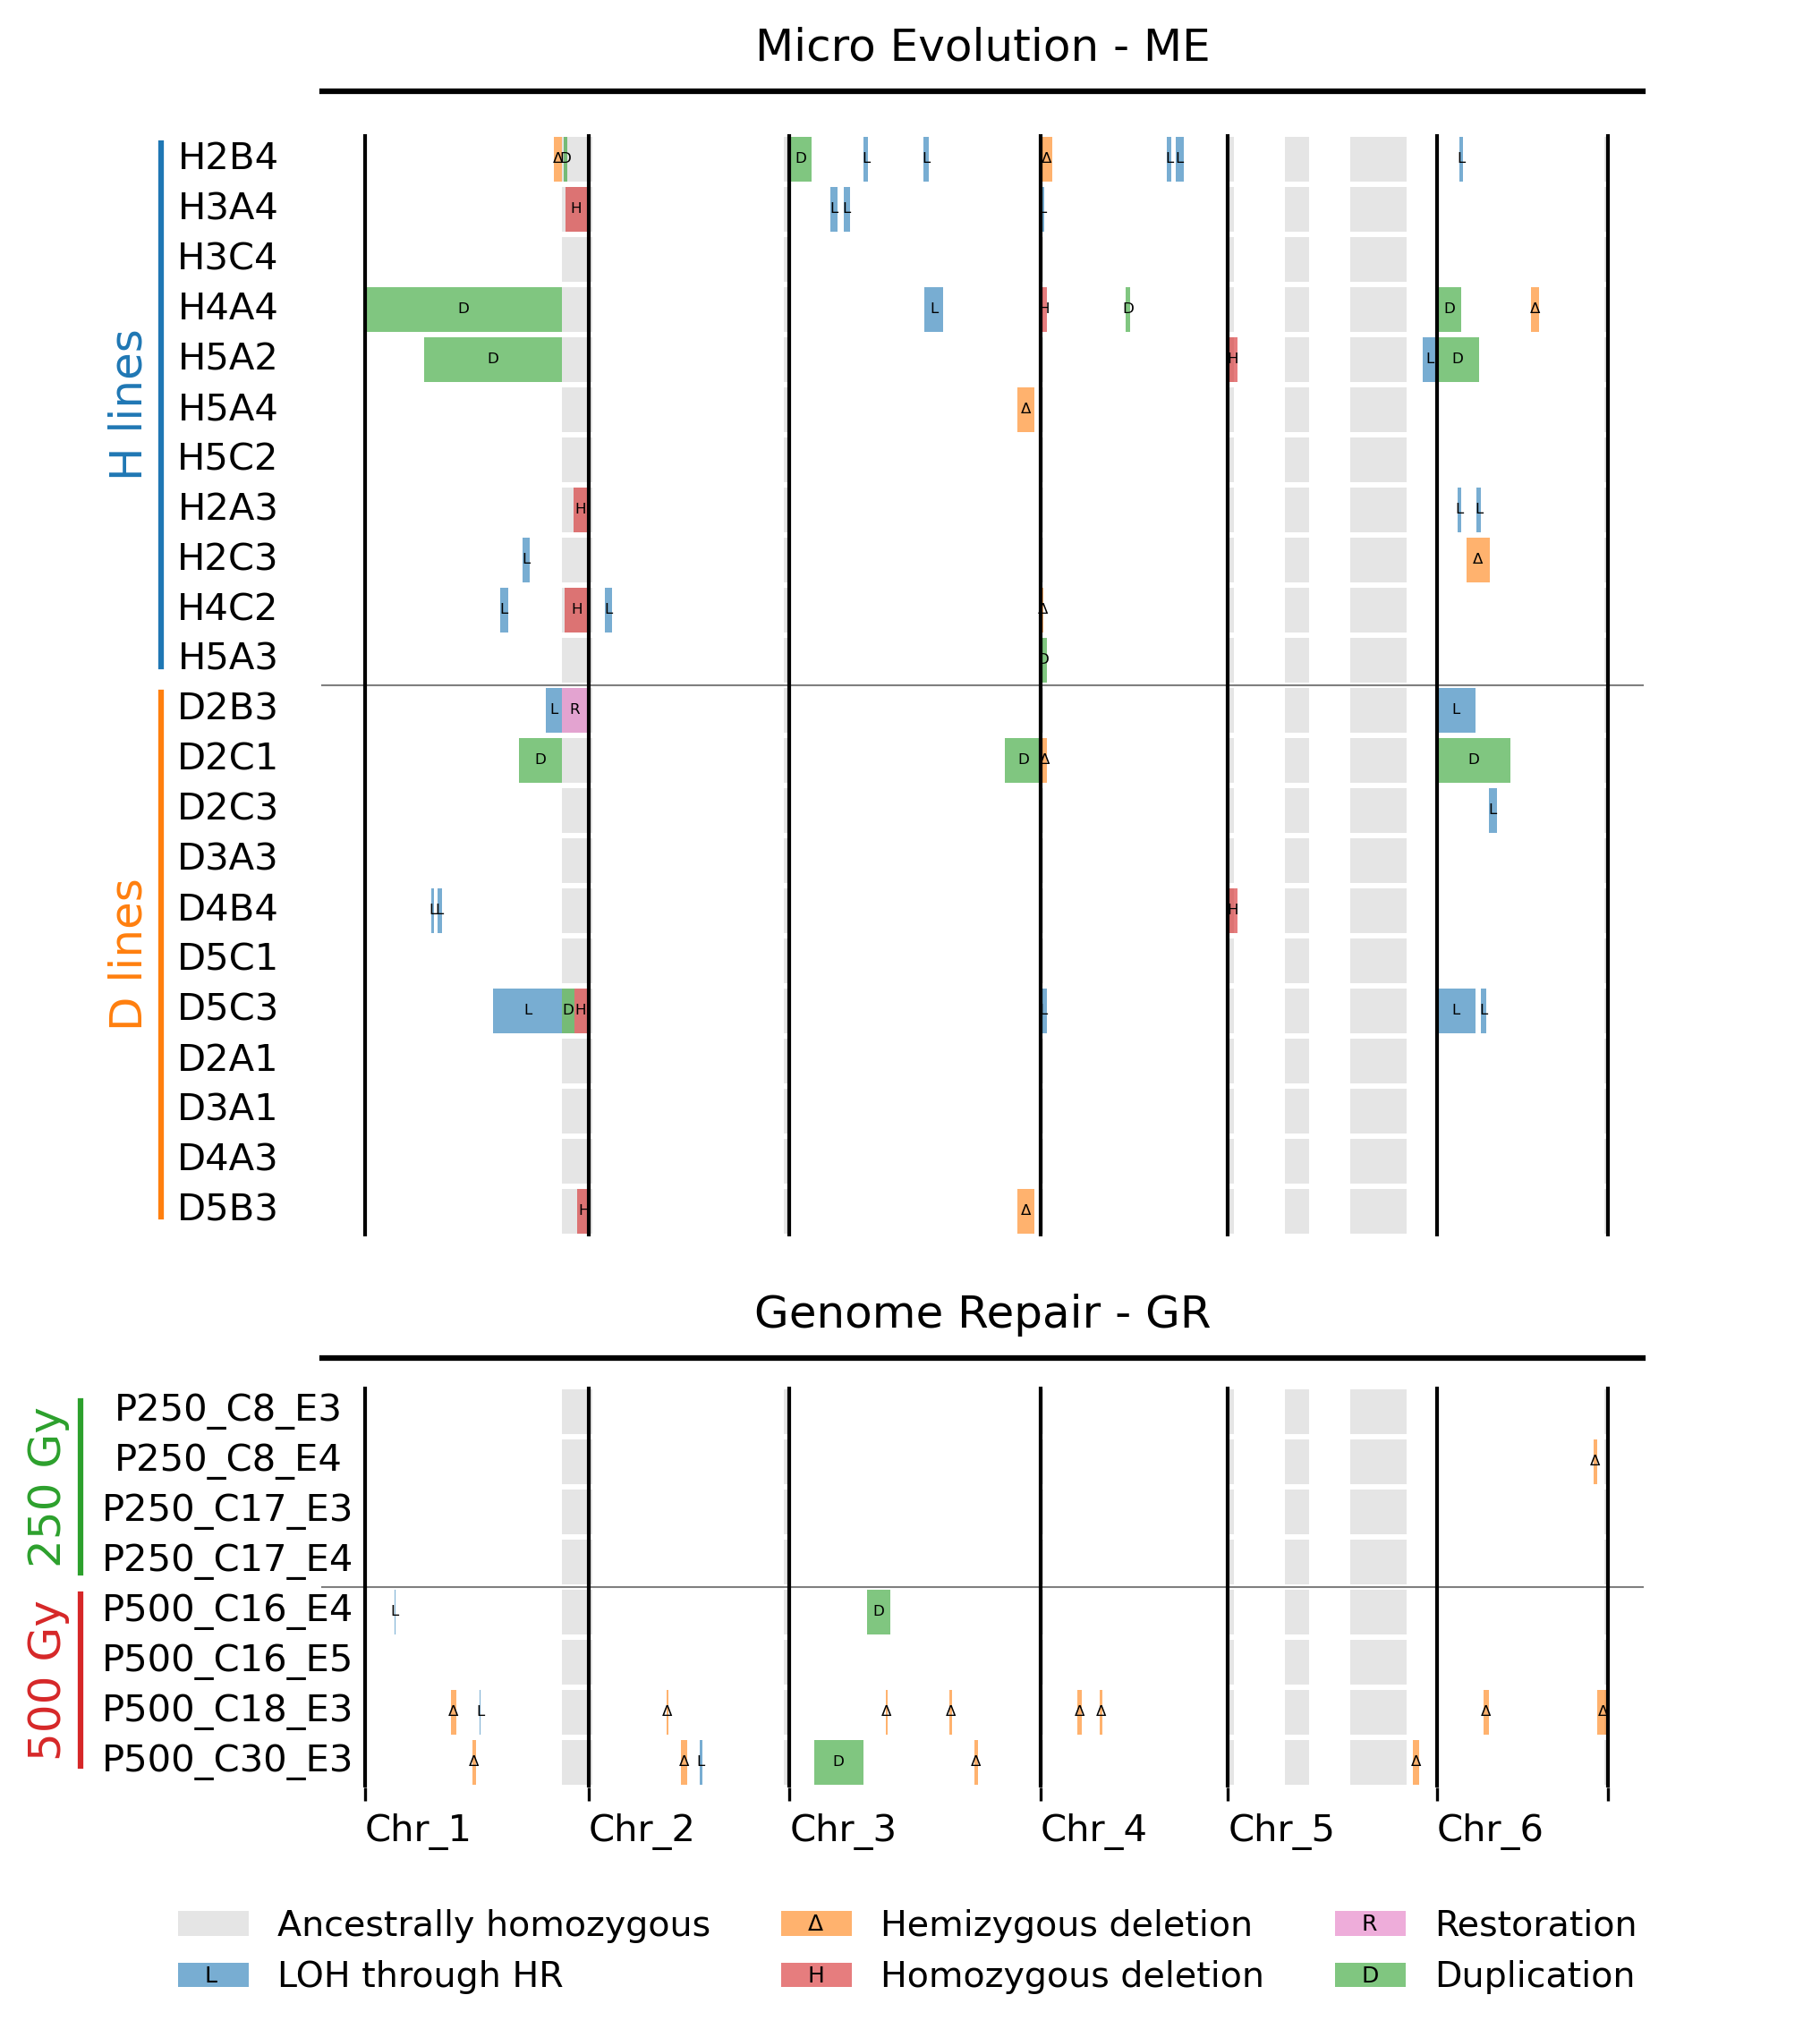

In [88]:
alpha_value = 0.6

total_length = sum([l for k, l in lengths.items()])

fig = plt.figure(figsize=(6,8))

gs = gridspec.GridSpec(2, 1, figure=fig, wspace=0, hspace=0.2, height_ratios=[22,8])

top = gridspec.GridSpecFromSubplotSpec(22, 1, subplot_spec=gs[0], wspace=0, hspace=0)
bottom = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=gs[1], wspace=0, hspace=0)

xticks = []
lsum = 0
for i in range(1, 7) :
    xticks.append(lsum)
    lsum += lengths["Chrom_{}".format(i)]
xticks.append(lsum)

all_axes = {}
for i, sm in enumerate(sample_list) :
    
    if i > 21 :
        all_axes[sm] = fig.add_subplot(bottom[i - 22])
    else :
        all_axes[sm] = fig.add_subplot(top[i])
    
    ax = all_axes[sm]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    if i != 29 :
        ax.set_xticks(xticks)
        ax.set_xticklabels(["" for _ in xticks])
        ax.tick_params(length=0)
    else :
        ax.set_xticks(xticks)
        ax.set_xticklabels(["Chr_1","Chr_2","Chr_3","Chr_4","Chr_5","Chr_6", ""], fontdict={"horizontalalignment":"left"})
        
    for tickpos in xticks :
        ax.plot([tickpos, tickpos], [-0.05,1.05], color="k", lw=1.0, zorder=10)
    
    ax.set_yticks([])
    ax.set_xlim(-2e5, total_length+2e5)

    anchom = []
    for region in ancestrally_homozygous :
        chrom_num, start, end = region[0], region[1]*1e6, region[2]*1e6
        ns, ne = get_pos(chrom_num, lengths, start, end)
        rect = Rectangle((ns, 0), ne-ns, 1, color=(0.0,0.0,0.0,0.05))
        anchom.append(rect)

    choms = PatchCollection(anchom, facecolor=(0.0,0.0,0.0,0.1), zorder=1, label="Ancestrally homozygous")
    ax.add_collection(choms)
    
    

for i, sm in enumerate(sample_list) :

    ax = all_axes[sm]
    dels = [] # Heterozygous deletion
    dups = [] # Duplication
    lohs = [] # LOH
    ress = [] # Restoration (cov = 1 previously 0.5)
    hdes = [] # Homozygous deletion

    for chrom, chrom_events in events[sm].items() :
        for e in chrom_events :
            start, end, typ = e[0]*1e6, e[1]*1e6, e[2]
            ns, ne = get_pos(int(chrom[-1]), lengths, start, end)
            rect = Rectangle((ns, 0), ne-ns, 1)
            if typ == "LOH" :
                lohs.append(rect)
            elif typ == "DEL" :
                dels.append(rect)
            elif typ == "DUP" :
                dups.append(rect)
            elif typ == "RES" :
                ress.append(rect)
            elif typ == "HDE" :
                hdes.append(rect)

            x_center = (ns + ne) / 2
            y_center = 0.5
            # Annotate with a label
            ax.text(x_center, y_center, event_labels.get(typ, "?"), ha='center', va='center', fontsize=4, zorder=4)

    clohs = PatchCollection(lohs, facecolor=colors["LOH"], zorder=3, alpha=alpha_value, label="LOH")
    cdels = PatchCollection(dels, facecolor=colors["DEL"], zorder=3, alpha=alpha_value, label="Deletion")
    cdups = PatchCollection(dups, facecolor=colors["DUP"], zorder=3, alpha=alpha_value, label="Duplication")
    cress = PatchCollection(ress, facecolor=colors["RES"], zorder=3, alpha=alpha_value, label="Restoration")
    chdes = PatchCollection(hdes, facecolor=colors["HDE"], zorder=3, alpha=alpha_value, label="Duplication")
    ax.add_collection(clohs)
    ax.add_collection(cdels)
    ax.add_collection(cdups)
    ax.add_collection(cress)
    ax.add_collection(chdes)

    ax.set_ylim(-0.05,1.05)
    ax.set_ylabel(sm, rotation=0.0, labelpad=36, va="center")

legend_elements = [
    Patch(facecolor="black", alpha=0.1, label="Ancestrally homozygous"),
    Patch(facecolor=colors["LOH"], alpha=alpha_value, label="LOH through HR"),
    Patch(facecolor=colors["DEL"], alpha=alpha_value, label="Hemizygous deletion"), # only red is lower alpha to avoid orange being invisible against red background
    Patch(facecolor=colors["HDE"], alpha=alpha_value, label="Homozygous deletion"),
    Patch(facecolor=colors["RES"], alpha=alpha_value, label="Restoration"),
    Patch(facecolor=colors["DUP"], alpha=alpha_value, label="Duplication"),
]

fig.lines.append( Line2D((0.1, 0.92), (0.9, 0.9), color="k", transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.lines.append( Line2D((0.1, 0.92), (0.31, 0.31), color="k", transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.text(x = 0.51, y = 0.91, s="Micro Evolution - ME", va="bottom", ha="center", fontsize=12)
fig.text(x = 0.51, y = 0.32, s="Genome Repair - GR", va="bottom", ha="center", fontsize=12)

fig.lines.append( Line2D((0, 0), (0.632, 0.876), color=ccycle[0], transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.text(x = -0.02, y = 0.754, color=ccycle[0], s="H lines", va="center", ha="center", fontsize=12, rotation = 90)
fig.lines.append( Line2D((0, 0), (0.376, 0.620), color=ccycle[1], transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.text(x = -0.02, y = 0.498, color=ccycle[1], s="D lines", va="center", ha="center", fontsize=12, rotation = 90)

fig.lines.append( Line2D((-0.05, -0.05), (0.21, 0.29), color=ccycle[2], transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.text(x = -0.07, y = 0.25, color=ccycle[2], s="250 Gy", va="center", ha="center", fontsize=12, rotation = 90)

fig.lines.append( Line2D((-0.05, -0.05), (0.12, 0.2), color=ccycle[3], transform=fig.transFigure, clip_on = False, alpha=1.0) )
fig.text(x = -0.07, y = 0.160, color=ccycle[3], s="500 Gy", va="center", ha="center", fontsize=12, rotation = 90)

fig.lines.append( Line2D((0.1, 0.92), (0.6235, 0.6235), color='k', transform=fig.transFigure, clip_on = False, alpha=0.5, lw=0.5) )
fig.lines.append( Line2D((0.1, 0.92), (0.2035, 0.2035), color='k', transform=fig.transFigure, clip_on = False, alpha=0.5, lw=0.5) )


event_names_labels = ["L", "Δ", "H", "R", "D",]

# Step 1: Create the legend and store it
legend = fig.legend(handles=legend_elements, loc=(0.09,0.01), fontsize=9.5, ncol=3, frameon=False)

def get_all_artists(artist):
    """Recursively get all child artists from a matplotlib Artist."""
    children = artist.get_children()
    all_artists = []
    for child in children:
        all_artists.append(child)
        if isinstance(child, Artist):
            all_artists.extend(get_all_artists(child))
    return all_artists

all_DrawingAreas = [da for da in get_all_artists(legend) if isinstance(da, DrawingArea)]
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
for i, da in enumerate(all_DrawingAreas[1:]):
    bbox: Bbox = da.get_window_extent(renderer=renderer)
    x0, y0, x1, y1 = bbox.extents
    x_left = x0
    y_center = (y0 + y1) / 2
    x_fig, y_fig = fig.transFigure.inverted().transform((x_left, y_center))

    fig.text(x_fig-0.072, y_fig-0.0035, event_names_labels[i], ha='left', va='center', fontsize=6, zorder=10)
    
    
plt.show()

# Showing whole data (ME)

#### Imports

### Need to use another version of pandas to read these files (some functions became deprecated)

- Works on pandas version...

In [15]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import pickle
import bz2
import os

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

mpl.rcParams['figure.dpi'] = 300

#### Get files and read function

In [18]:
summary_dir = "/media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/"

GR_samples = ['ancestor', 'P100_C8_E4', '30H_C36_E5', 'P250_C8_E3', '30D_C52_E5', '30D_C38_E4', 'P500_C16_E5', 'P100_C30_E4', '30H_C3_E5', 'P0_C27_E5', 'P500_C16_E4', '30D_C13_E3', '30D_C38_E5', 'P0_C9_E5', '30H_C48_E5', 'P250_C17_E4', 'P0_C9_E4', '30H_C3_E4', 'P100_C8_E3', 'P250_C8_E4', 'P500_C30_E3', 'P250_C17_E3', 'P500_C18_E3', 'P0_C40_E5', 'P100_C30_E3']
ME_samples = ['D5C1', 'D2C1', 'H4A4', 'D4B4_50G', 'H5A2', 'D3A3_50G', 'H3C4_50G', 'H5A2_50G', 'H5C2_50G', 'H3A4_50G', 'D4B4', 'H2C3', 'D5C1_50G', 'H5A4', 'H4A4_50G', 'H2A3', 'D2C3_50G', 'H2B4_50G', 'D3A3', 'D2B3', 'H3A4', 'D3A1', 'H5A3', 'D5B3', 'D5C3', 'D5C3_50G', 'D2C3', 'H4C2', 'H5A4_50G', 'D2C1_50G', 'H2B4', 'D4A3', 'H5C2', 'D2A1', 'D2B3_50G', 'H3C4']
all_samples = GR_samples+ME_samples
all_files_per_sample = {sm:{'AF':None,'COV':None} for sm in all_samples}

skip_files = [
    "GR_P500C18E3_AF_COV_Illumina_ONT.pkl.bz2",
    "GR_P500C16E4_AF_COV_Illumina.pkl.bz2"
]

files = os.listdir(summary_dir)
for file in files :
    if file in skip_files :
        continue
    if "_AF_" in file :
        sample = file.split("_AF_windows.pbz2")[0]
        all_files_per_sample[sample]["AF"] = file
    elif "_COV_" in file :
        sample = file.split("_COV_windows.pbz2")[0]
        all_files_per_sample[sample]["COV"] = file
    else :
        #print("ERROR", file)
        pass

files = [f for f in files if f.endswith("pbz2")]
print(len(files))

def get_AF_and_COV(summary_dir, dc) :
    AF = None
    COV = None
    with bz2.BZ2File(summary_dir + "/" + dc["AF"], 'rb') as f:
        AF = pickle.load(f)
    
    with bz2.BZ2File(summary_dir + "/" + dc["COV"], 'rb') as f:
        COV = pickle.load(f)
        
    return AF, COV

123


### Information

In [19]:
ME_samples_positions = {
    "H2B4":0,
    "H2B4_50G":0,
    "H3A4":1,
    "H3A4_50G":1,
    "H3C4":2,
    "H3C4_50G":2,
    "H4A4":3,
    "H4A4_50G":3,
    "H5A2":4,
    "H5A2_50G":4,
    "H5A4":5,
    "H5A4_50G":5,
    "H5C2":6,
    "H5C2_50G":6,
    "H2A3":7,
    "H2C3":8,
    "H4C2":9,
    "H5A3":10,
    "D2B3":11,
    "D2B3_50G":11,
    "D2C1":12,
    "D2C1_50G":12,
    "D2C3":13,
    "D2C3_50G":13,
    "D3A3":14,
    "D3A3_50G":14,
    "D4B4":15,
    "D4B4_50G":15,
    "D5C1":16,
    "D5C1_50G":16,
    "D5C3":17,
    "D5C3_50G":17,
    "D2A1":18,
    "D3A1":19,
    "D4A3":20,
    "D5B3":21,
}

lengths = {
    "Chrom_1": 18146847,
    "Chrom_2": 16274841,
    "Chrom_3": 20354777,
    "Chrom_4": 15224634,
    "Chrom_5": 16930519,
    "Chrom_6": 13893210,
}

### Measures

In [20]:
def get_LOH_score(anc_AF, off_AF) :    
    delta = anc_AF["AF", "mean"] - off_AF["AF", "mean"]
    return delta.apply(lambda x: 2*abs(x)) # 1.0 = LOH, 0.0 = no changes

def get_COV_score(anc_COV, off_COV) :
    return off_COV["nCOV", "mean"] - anc_COV["nCOV", "mean"]

### Annotations

In [21]:
events = {
    "30H_C36_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C48_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C3_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C3_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C13_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C38_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C38_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C52_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C27_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C9_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C9_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C40_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C8_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C8_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C30_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C30_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C8_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C8_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(12.7, 13.0, 'DEL')]} ,
    "P250_C17_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C17_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P500_C18_E3" : {'Chrom_1': [(7.0, 7.4, 'DEL'), (9.3, 9.4, 'LOH')], 'Chrom_2': [(6.3, 6.5, 'DEL')], 'Chrom_3': [(7.8, 8.0, 'DEL'), (13.0, 13.2, 'DEL')], 'Chrom_4': [(3.0, 3.4, 'DEL'), (4.8, 5.0, 'DEL')], 'Chrom_5': [], 'Chrom_6': [(3.8, 4.2, 'DEL'), (13.0, 14.0, 'DEL')]} ,
    "P500_C30_E3" : {'Chrom_1': [(8.7, 9.0, 'DEL')], 'Chrom_2': [(7.5, 8.0, 'DEL'), (9.0, 9.2, 'LOH')], 'Chrom_3': [(2.0, 6.0, 'DUP'), (15.0, 15.3, 'DEL')], 'Chrom_4': [], 'Chrom_5': [(15.0, 15.5, 'DEL')], 'Chrom_6': []} ,
    "P500_C16_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P500_C16_E4" : {'Chrom_1': [(2.419, 2.467, 'LOH')], 'Chrom_2': [], 'Chrom_3': [(6.3, 8.2, 'DUP')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H2B4" : {'Chrom_1': [(15.3, 16.0, 'DEL'), (16.1, 16.4, 'DUP')], 'Chrom_2': [], 'Chrom_3': [(0.0, 1.8, 'DUP'), (6.0, 6.4, 'LOH'), (10.9, 11.3, 'LOH')], 'Chrom_4': [(0.0, 1.0, 'DEL'), (10.25, 10.65, 'LOH'), (11.0, 11.6, 'LOH')], 'Chrom_5': [], 'Chrom_6': [(1.8, 2.15, 'LOH')]} ,
    "H2B4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3A4" : {'Chrom_1': [(16.3, 18.0, 'HDE')], 'Chrom_2': [], 'Chrom_3': [(3.35, 3.9, 'LOH'), (4.4, 4.9, 'LOH')], 'Chrom_4': [(0.0, 0.35, 'LOH')], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3A4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3C4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H3C4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H4A4" : {'Chrom_1': [(0.0, 16.0, 'DUP')], 'Chrom_2': [], 'Chrom_3': [(10.95, 12.5, 'LOH')], 'Chrom_4': [(0.0, 0.55, 'HDE'), (6.9, 7.3, 'DUP')], 'Chrom_5': [], 'Chrom_6': [(0.0, 2.0, 'DUP'), (7.6, 8.3, 'DEL')]} ,
    "H4A4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "H5A2" : {'Chrom_1': [(4.8, 16.0, 'DUP')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [(15.75, 17.0, 'LOH'), (0.0, 0.75, 'HDE')], 'Chrom_6': [(0.0, 3.4, 'DUP')]},
    "H5A2_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5A4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [(18.5, 19.9, 'DEL')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5A4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5C2" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H5C2_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []},
    "H2A3" : {'Chrom_1': [(16.9, 18.1, 'HDE')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(1.65, 1.95, 'LOH'), (3.2, 3.6, 'LOH')]} ,
    "H2C3" : {'Chrom_1': [(12.8, 13.4, 'LOH')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(2.4, 4.3, 'DEL')]} ,
    "H4C2" : {'Chrom_1': [(11.0, 11.6, 'LOH'), (16.2, 18.2, 'HDE')], 'Chrom_2': [(1.3, 1.9, 'LOH')], 'Chrom_3': [], 'Chrom_4': [(0.19, 0.27,'DEL')], 'Chrom_5': [], 'Chrom_6': []} ,
    "H5A3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [(0, 0.5,'DUP')], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2B3" : {'Chrom_1': [(14.7, 16.0, 'LOH'), (16.0, 18.0, 'RES')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(0.0, 3.1, 'LOH')]} ,
    "D2B3_50G" : {'Chrom_1': [(0.4, 2.7, 'LOH')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2C1" : {'Chrom_1': [(12.5, 16.0, 'DUP')], 'Chrom_2': [], 'Chrom_3': [(17.5, 20.5, 'DUP')], 'Chrom_4': [(0.16, 0.51, 'DEL')], 'Chrom_5': [], 'Chrom_6': [(0.0, 6.0, 'DUP')]} ,
    "D2C1_50G" : {'Chrom_1': [(11.0, 12.0, 'DEL')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2C3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(4.2, 4.9, 'LOH')]} ,
    "D2C3_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D3A3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D3A3_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D4B4" : {'Chrom_1': [(5.4, 5.6, 'LOH'), (5.9, 6.25, 'LOH')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [(0.0, 0.75, 'HDE')], 'Chrom_6': []} ,
    "D4B4_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5C1" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5C1_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5C3" : {'Chrom_1': [(10.4, 16.0, 'LOH'), (16.0, 17.0, 'DUP'), (17.0, 18.0, 'HDE')], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [(0.0, 0.5, 'LOH')], 'Chrom_5': [], 'Chrom_6': [(0.0, 3.15, 'LOH'), (3.6, 4.0, 'LOH')]} ,
    "D5C3_50G" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D2A1" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D3A1" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D4A3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "D5B3" : {'Chrom_1': [(17.2, 18.3, 'HDE')], 'Chrom_2': [], 'Chrom_3': [(18.5, 19.9, 'DEL')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
}

ancestrally_homozygous = [
    (1, 16.0, 18.3),
    (2, 15.8, 16.3),
    (2, 0.0, 0.3),
    (4, 0.0, 0.25),
    (5, 0.0, 0.5),
    (5, 4.6, 6.6),
    (5, 9.9, 14.5),
    (6, 13.55, 13.9),
]

### Colors

In [22]:
colors = {
    "LOH":ccycle[0], # LOH
    "DUP":ccycle[2], # Duplication
    "RES":ccycle[6], # Restoration (cov = 1 previously 0.5)
    "DEL":ccycle[1], # Heterozygous deletion
    "HDE":ccycle[3], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}

## Plot

In [ ]:
anc_AF, anc_COV = get_AF_and_COV(summary_dir, all_files_per_sample["ancestor"])

fig = plt.figure(figsize=(10,24), dpi=300) #, tight_layout=True) #) #, axs = plt.subplots(nrows=44, ncols=12, )

gs = gridspec.GridSpec(22, 1, figure=fig, wspace=0, hspace=0.075)

sub_gs_dc = {
    "H2B4": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[0], wspace=0, hspace=0),
    "H3A4": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[1], wspace=0, hspace=0),
    "H3C4": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[2], wspace=0, hspace=0),
    "H4A4": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[3], wspace=0, hspace=0),
    "H5A2": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[4], wspace=0, hspace=0),
    "H5A4": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[5], wspace=0, hspace=0),
    "H5C2": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[6], wspace=0, hspace=0),
    "H2A3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[7], wspace=0, hspace=0),
    "H2C3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[8], wspace=0, hspace=0),
    "H4C2": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[9], wspace=0, hspace=0),
    "H5A3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[10], wspace=0, hspace=0),
    
    "D2B3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[11], wspace=0, hspace=0),
    "D2C1": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[12], wspace=0, hspace=0),
    "D2C3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[13], wspace=0, hspace=0),
    "D3A3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[14], wspace=0, hspace=0),
    "D4B4": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[15], wspace=0, hspace=0),
    "D5C1": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[16], wspace=0, hspace=0),
    "D5C3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[17], wspace=0, hspace=0),
    "D2A1": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[18], wspace=0, hspace=0),
    "D3A1": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[19], wspace=0, hspace=0),
    "D4A3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[20], wspace=0, hspace=0),
    "D5B3": gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[21], wspace=0, hspace=0),
}

# First loop to create all axes
all_axes = {}
for sample, gs in sub_gs_dc.items() :
    if sample == "ancestor" :
        continue
    
    if sample not in ME_samples :
        continue
    
    # Create axes for all samples
    gs = sub_gs_dc[sample]
    AF_axs = [fig.add_subplot(gs[0, i]) for i in range(6)]
    COV_axs = [fig.add_subplot(gs[1, i]) for i in range(6)]
    all_axes[sample+"_50G"] = {"AF":AF_axs, "COV":COV_axs}
    all_axes[sample] = {"AF":AF_axs, "COV":COV_axs}
    
    # Create an empty ax to add label
    ax = fig.add_subplot(gs[:])
    ax.set_frame_on(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(sample, labelpad=40, fontsize=12)

# Second loop to fill in axes with plots of data
for sample, dc_files in all_files_per_sample.items() :
    if sample == "ancestor" :
        continue
    
    if sample not in ME_samples :
        continue
        
    AF_axs = all_axes[sample]["AF"]
    COV_axs = all_axes[sample]["COV"]
    AF, COV = get_AF_and_COV(summary_dir, dc_files)
    
    sample_events = events[sample]
    
    for col in range(6) :
        ctg = "Chrom_{}".format(col+1)
        ctg_events = sample_events[ctg]
        AF_score = get_LOH_score(anc_AF[ctg], AF[ctg])
        COV_score = get_COV_score(anc_COV[ctg], COV[ctg])
        
        # AF
        ax = AF_axs[col]
        color = colors["midpoint"] if "50G" in sample else colors["endpoint"]
        zorder = 3 if "50G" in sample else 5
        ax.plot(AF[ctg]["POS", "mean"], AF_score.values, lw=0.75, color=color, zorder=zorder)
        if col == 0 :
            ax.set_ylabel("LOH\nScore", fontsize=8)
        for event in ctg_events :
            #print(event, sample)
            x1, x2, color = event[0]*1e6, event[1]*1e6, colors[event[2]]
            alpha = 0.4 if event[2] != "DEL" else 0.25
            ax.axvspan(x1, x2, facecolor=color, alpha=alpha)
        if "50G" not in sample :
            for region in ancestrally_homozygous :
                if region[0] == col+1 :
                    #print(region[0], col+1, ctg)
                    ax.axvspan(region[1]*1e6, region[2]*1e6, facecolor="black", alpha=0.05)
        
        # COVERAGE
        ax = COV_axs[col]
        color = colors["midpoint"] if "50G" in sample else colors["endpoint"]
        zorder = 3 if "50G" in sample else 5
        ax.plot(COV[ctg]["POS", "mean"], COV_score.values, lw=0.75, color=color, zorder=zorder)
        if col == 0 :
            ax.set_ylabel(r"$\Delta$Cov", fontsize=8)
        for event in ctg_events :
            x1, x2, color = event[0]*1e6, event[1]*1e6, colors[event[2]]
            alpha = 0.4 if event[2] != "DEL" else 0.25
            ax.axvspan(x1, x2, facecolor=color, alpha=alpha)
        if "50G" not in sample :
            for region in ancestrally_homozygous :
                if region[0] == col+1 :
                    ax.axvspan(region[1]*1e6, region[2]*1e6, facecolor="black", alpha=0.05)

for sample, dc in all_axes.items() :
    
    for i, ax in enumerate(dc["AF"]) : # top row (AF)
        
        ax.set_ylim(-0.1,1.1)
        if i == 0 :
            ax.set_yticks([0.0, 0.5, 1.0])
            ax.tick_params(axis="y", labelsize=6)
        else :
            ax.tick_params(axis="both", length=0)
            ax.set_yticklabels([])
        
        contig = "Chrom_{}".format(i+1)
        length = lengths[contig]
        ax.set_xlim(-0.1e6, length+0.1e6)
        ax.tick_params(axis="x", length=0)
        ax.set_xticklabels([])
        
    for i, ax in enumerate(dc["COV"]) : # top row
        
        ax.set_ylim(-1.1,1.1)
        if i == 0 :
            ax.set_yticks([-0.5, 0.0, 0.5])
            ax.tick_params(axis="y", labelsize=6)
        else :
            ax.tick_params(axis="y", length=0)
            ax.set_yticks([])
            
        # x ticks
        contig = "Chrom_{}".format(i+1)
        length = lengths[contig]
        xticks = [i*5e6 for i in range(int(length//5e6))] + [(length//1e6)*1e6]
        ax.set_xticks(xticks[1:])
        ax.set_xlim(-0.1e6, length+0.1e6)
        
        if sample == "D5B3" or sample == "D5B3_50G" :
            xticklabels = ["{}M".format(int(i/1e6)) for i in xticks[1:]]
            ax.set_xticklabels(xticklabels, fontsize=6) # labels only on bottom row
            ax.set_xlabel(contig, fontsize=12)
        else :
            ax.tick_params(axis="x", length=0)
            ax.set_xticklabels([]) # no tick labels
        
plt.show()

### Legend

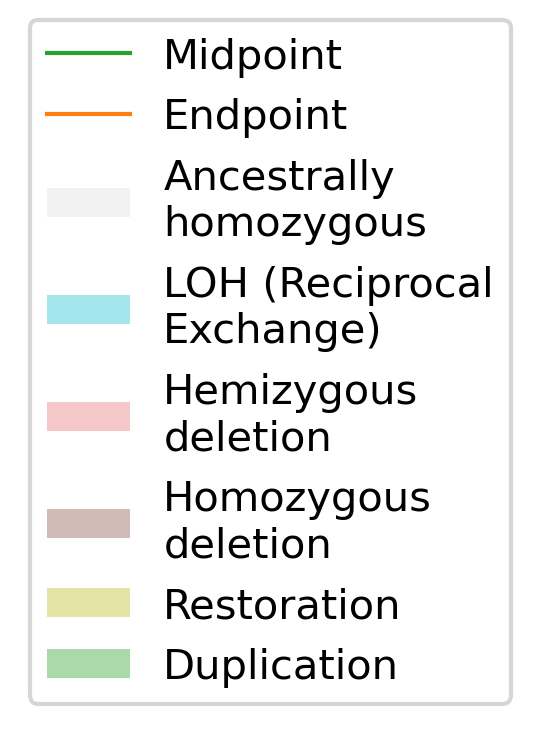

In [17]:
fig, ax = plt.subplots()

legend_elements = [
    Line2D([0],[0], lw=1.0, color=colors["midpoint"], label="Midpoint"),
    Line2D([0],[0], lw=1.0, color=colors["endpoint"], label="Endpoint"),
    Patch(facecolor="black", alpha=0.05, label="Ancestrally\nhomozygous"),
    Patch(facecolor=colors["LOH"], alpha=0.4, label="LOH (Reciprocal\nExchange)"),
    Patch(facecolor=colors["DEL"], alpha=0.25, label="Hemizygous\ndeletion"), # only red is lower alpha to avoid orange being invisible against red background
    Patch(facecolor=colors["HDE"], alpha=0.4, label="Homozygous\ndeletion"),
    Patch(facecolor=colors["RES"], alpha=0.4, label="Restoration"),
    Patch(facecolor=colors["DUP"], alpha=0.4, label="Duplication"),
]

fig.legend(handles=legend_elements, loc="upper center", fontsize=10, ncol=1)

ax.set_visible(False)

plt.show()

# Showing whole data (GR)

#### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import pickle
import bz2
import os

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

mpl.rcParams['figure.dpi'] = 300

#### Get files and read function

In [2]:
summary_dir = "/media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/"

GR_samples = ['ancestor', 'P100_C8_E4', '30H_C36_E5', 'P250_C8_E3', '30D_C52_E5', '30D_C38_E4', 'P500_C16_E5', 'P100_C30_E4', '30H_C3_E5', 'P0_C27_E5', 'P500_C16_E4', '30D_C13_E3', '30D_C38_E5', 'P0_C9_E5', '30H_C48_E5', 'P250_C17_E4', 'P0_C9_E4', '30H_C3_E4', 'P100_C8_E3', 'P250_C8_E4', 'P500_C30_E3', 'P250_C17_E3', 'P500_C18_E3', 'P0_C40_E5', 'P100_C30_E3']
ME_samples = ['D5C1', 'D2C1', 'H4A4', 'D4B4_50G', 'H5A2', 'D3A3_50G', 'H3C4_50G', 'H5A2_50G', 'H5C2_50G', 'H3A4_50G', 'D4B4', 'H2C3', 'D5C1_50G', 'H5A4', 'H4A4_50G', 'H2A3', 'D2C3_50G', 'H2B4_50G', 'D3A3', 'D2B3', 'H3A4', 'D3A1', 'H5A3', 'D5B3', 'D5C3', 'D5C3_50G', 'D2C3', 'H4C2', 'H5A4_50G', 'D2C1_50G', 'H2B4', 'D4A3', 'H5C2', 'D2A1', 'D2B3_50G', 'H3C4']
all_samples = GR_samples+ME_samples
all_files_per_sample = {sm:{'AF':None,'COV':None} for sm in all_samples}

files = os.listdir(summary_dir)
for file in files :
    if file == "GR_P500C18E3_AF_COV_Illumina_ONT.pkl.bz2" :
        continue
    if "_AF_" in file :
        sample = file.split("_AF_windows.pbz2")[0]
        all_files_per_sample[sample]["AF"] = file
    elif "_COV_" in file :
        sample = file.split("_COV_windows.pbz2")[0]
        all_files_per_sample[sample]["COV"] = file
    else :
        #print("ERROR", file)
        pass

files = [f for f in files if f.endswith("pbz2")]
print(len(files))

def get_AF_and_COV(summary_dir, dc) :
    AF = None
    COV = None
    with bz2.BZ2File(summary_dir + "/" + dc["AF"], 'rb') as f:
        AF = pickle.load(f)
    
    with bz2.BZ2File(summary_dir + "/" + dc["COV"], 'rb') as f:
        COV = pickle.load(f)
        
    return AF, COV

123


### Information

In [3]:
GR_samples_positions = {
    "30H_C3_E4":0,
    "30H_C3_E5":1,
    "30H_C36_E5":2,
    "30H_C48_E5":3,
    "30D_C13_E3":4,
    "30D_C38_E4":5,
    "30D_C38_E5":6,
    "30D_C52_E5":7,
    "P0_C9_E4":8,
    "P0_C9_E5":9,
    "P0_C27_E5":10,
    "P0_C40_E5":11,
    "P100_C8_E3":12,
    "P100_C8_E4":13,
    "P100_C30_E3":14,
    "P100_C30_E4":15,
    "P250_C8_E3":16,
    "P250_C8_E4":17,
    "P250_C17_E3":18,
    "P250_C17_E4":19,
    "P500_C16_E4":20,
    "P500_C16_E5":21,
    "P500_C18_E3":22,
    "P500_C30_E3":23,
}

lengths = {
    "Chrom_1": 18146847,
    "Chrom_2": 16274841,
    "Chrom_3": 20354777,
    "Chrom_4": 15224634,
    "Chrom_5": 16930519,
    "Chrom_6": 13893210,
}

### Measures

In [4]:
def get_LOH_score(anc_AF, off_AF) :
    delta = anc_AF["AF", "mean"] - off_AF["AF", "mean"]
    return delta.apply(lambda x: 2*abs(x)) # 1.0 = LOH, 0.0 = no changes

def get_COV_score(anc_COV, off_COV) :
    return off_COV["nCOV", "mean"] - anc_COV["nCOV", "mean"]

### Annotations

In [5]:
events = {
    "30H_C36_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C48_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C3_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30H_C3_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C13_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C38_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C38_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "30D_C52_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C27_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C9_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C9_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P0_C40_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C8_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C8_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C30_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P100_C30_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C8_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C8_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': [(12.9, 14.0, 'HDE')]} ,
    "P250_C17_E3" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P250_C17_E4" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P500_C18_E3" : {'Chrom_1': [(0.0, 0.75,'DEL'), (6.8, 7.4, 'DEL'), (9.1, 9.4, 'BIHER')], 'Chrom_2': [(6.1, 6.6, 'DEL')], 'Chrom_3': [(7.6, 8.1, 'DEL'), (12.7, 13.2, 'DEL')], 'Chrom_4': [(2.8, 3.6, 'DEL'), (4.8, 5.1, 'DEL')], 'Chrom_5': [], 'Chrom_6': [(3.6, 4.3, 'DEL'), (13.0, 13.4, 'DEL'), (13.4, 14.0, 'HDE')]},
    "P500_C30_E3" : {'Chrom_1': [(8.4, 8.7, 'DEL')], 'Chrom_2': [(7.3, 8.1, 'DEL'), (8.4, 8.9, 'BIHER')], 'Chrom_3': [(2.2, 6.1, 'DUP'), (14.8, 15.3, 'DEL')], 'Chrom_4': [], 'Chrom_5': [(14.7, 15.6, 'DEL')], 'Chrom_6': []} ,
    "P500_C16_E5" : {'Chrom_1': [], 'Chrom_2': [], 'Chrom_3': [], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
    "P500_C16_E4" : {'Chrom_1': [(2.3, 2.6, 'BIHER')], 'Chrom_2': [], 'Chrom_3': [(6.5, 8.5, 'DUP')], 'Chrom_4': [], 'Chrom_5': [], 'Chrom_6': []} ,
}

ancestrally_homozygous = [
    (1, 16.0, 18.3),
    (2, 15.8, 16.3),
    (2, 0.0, 0.3),
    (4, 0.0, 0.25),
    (5, 0.0, 0.5),
    (5, 4.6, 6.6),
    (5, 9.9, 14.5),
    (6, 13.55, 13.9),
]

### Colors

In [19]:
colors = {
    "DEL":ccycle[3], # Heterozygous deletion
    "DUP":ccycle[2], # Duplication
    "LOH":ccycle[9], # LOH
    "RES":ccycle[8], # Restoration (cov = 1 previously 0.5)
    "HDE":ccycle[5], # Homozygous deletion
    "BIHER":ccycle[4], # LOH with AF changes
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}

## Plot

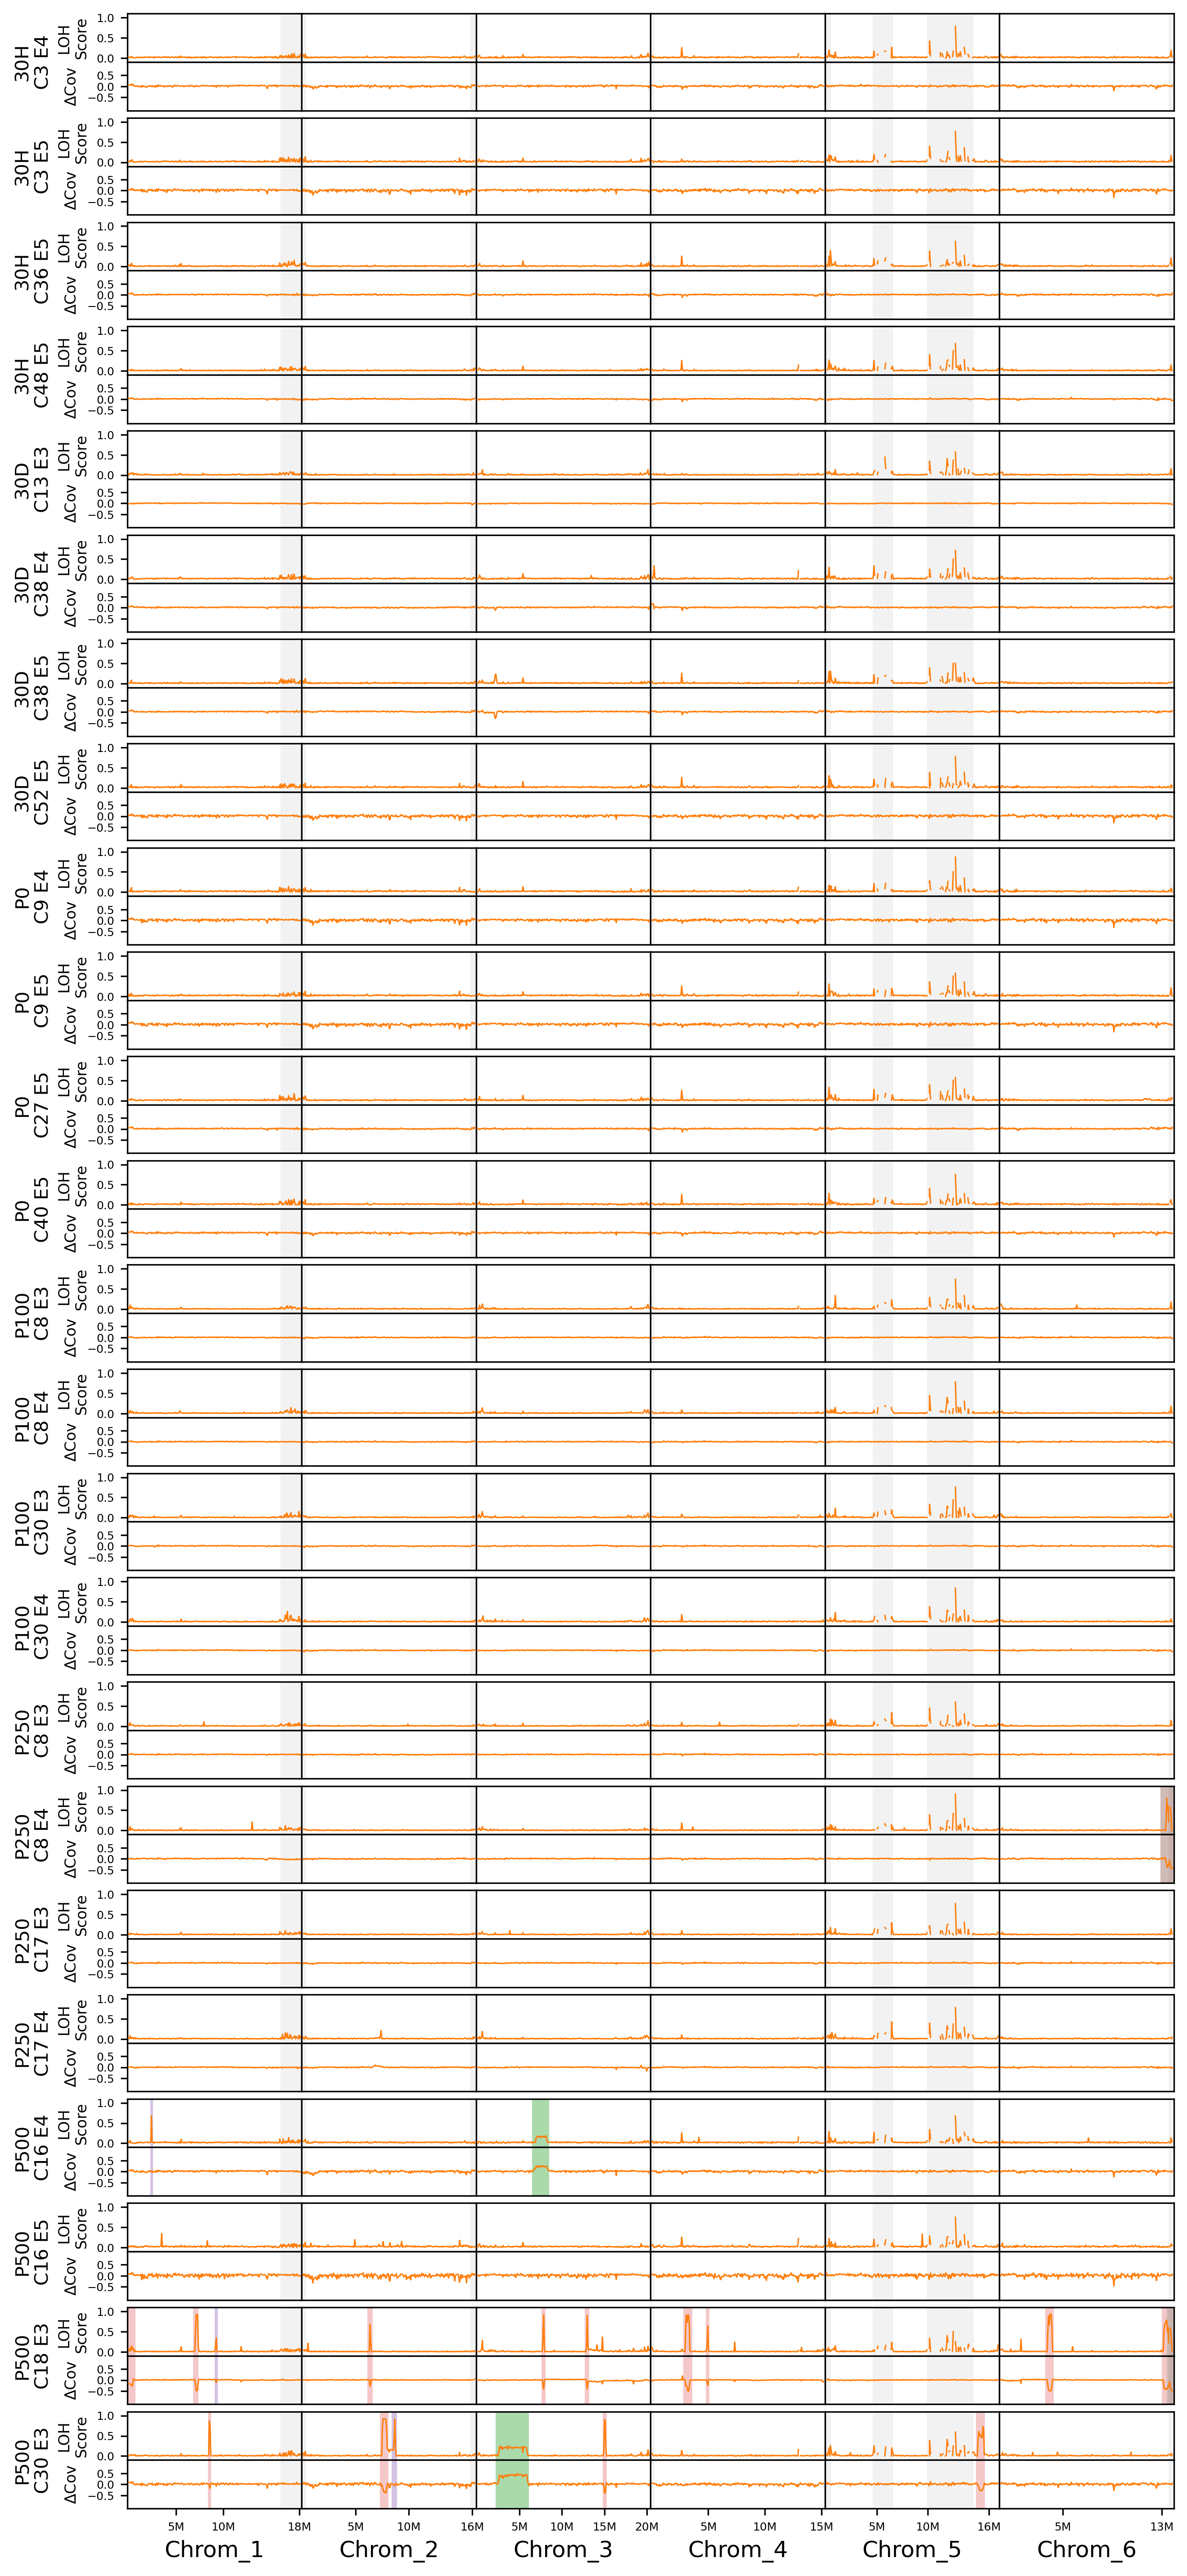

In [7]:
anc_AF, anc_COV = get_AF_and_COV(summary_dir, all_files_per_sample["ancestor"])

fig = plt.figure(figsize=(10,24), dpi=300) #, tight_layout=True) #) #, axs = plt.subplots(nrows=44, ncols=12, )

gs = gridspec.GridSpec(24, 1, figure=fig, wspace=0, hspace=0.075)

sub_gs_dc = {sm: gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs[pos], wspace=0, hspace=0) for sm, pos in GR_samples_positions.items()}

# First loop to create all axes
all_axes = {}
for sample, gs in sub_gs_dc.items() :
    if sample == "ancestor" :
        continue
    
    if sample not in GR_samples_positions.keys() :
        continue
    
    # Create axes for all samples
    gs = sub_gs_dc[sample]
    AF_axs = [fig.add_subplot(gs[0, i]) for i in range(6)]
    COV_axs = [fig.add_subplot(gs[1, i]) for i in range(6)]
    all_axes[sample] = {"AF":AF_axs, "COV":COV_axs}
    
    # Create an empty ax to add label
    ax = fig.add_subplot(gs[:])
    ax.set_frame_on(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticks([])
    ax.set_yticks([])
    ylabel = sample.split("_")[0] + "\n" + " ".join(sample.split("_")[1:])
    ax.set_ylabel(ylabel, labelpad=40, fontsize=10)

# Second loop to fill in axes with plots of data
for sample, dc_files in all_files_per_sample.items() :
    if sample == "ancestor" :
        continue
    
    if sample not in GR_samples_positions.keys() :
        continue
        
    AF_axs = all_axes[sample]["AF"]
    COV_axs = all_axes[sample]["COV"]
    AF, COV = get_AF_and_COV(summary_dir, dc_files)
    
    sample_events = events[sample]
    
    for col in range(6) :
        ctg = "Chrom_{}".format(col+1)
        ctg_events = sample_events[ctg]
        AF_score = get_LOH_score(anc_AF[ctg], AF[ctg])
        COV_score = get_COV_score(anc_COV[ctg], COV[ctg])
        
        # AF
        ax = AF_axs[col]
        color = colors["endpoint"]
        ax.plot(AF[ctg]["POS", "mean"], AF_score.values, lw=0.75, color=color, zorder=5)
        if col == 0 :
            ax.set_ylabel("LOH\nScore", fontsize=8)
        for event in ctg_events :
            x1, x2, color = event[0]*1e6, event[1]*1e6, colors[event[2]]
            alpha = 0.4 if event[2] != "DEL" else 0.25
            ax.axvspan(x1, x2, facecolor=color, alpha=alpha)
            
        for region in ancestrally_homozygous :
            if region[0] == col+1 :
                ax.axvspan(region[1]*1e6, region[2]*1e6, facecolor="black", alpha=0.05)

        # COVERAGE
        ax = COV_axs[col]
        color = colors["endpoint"]
        ax.plot(COV[ctg]["POS", "mean"], COV_score.values, lw=0.75, color=color, zorder=5)
        if col == 0 :
            ax.set_ylabel(r"$\Delta$Cov", fontsize=8)
        for event in ctg_events :
            x1, x2, color = event[0]*1e6, event[1]*1e6, colors[event[2]]
            alpha = 0.4 if event[2] != "DEL" else 0.25
            ax.axvspan(x1, x2, facecolor=color, alpha=alpha)
        for region in ancestrally_homozygous :
            if region[0] == col+1 :
                ax.axvspan(region[1]*1e6, region[2]*1e6, facecolor="black", alpha=0.05)

for sample, dc in all_axes.items() :
    
    for i, ax in enumerate(dc["AF"]) : # top row (AF)
        
        ax.set_ylim(-0.1,1.1)
        if i == 0 :
            ax.set_yticks([0.0, 0.5, 1.0])
            ax.tick_params(axis="y", labelsize=6)
        else :
            ax.tick_params(axis="both", length=0)
            ax.set_yticklabels([])
        
        contig = "Chrom_{}".format(i+1)
        length = lengths[contig]
        ax.set_xlim(-0.1e6, length+0.1e6)
        ax.tick_params(axis="x", length=0)
        ax.set_xticklabels([])
        
    for i, ax in enumerate(dc["COV"]) : # top row
        
        ax.set_ylim(-1.1,1.1)
        if i == 0 :
            ax.set_yticks([-0.5, 0.0, 0.5])
            ax.tick_params(axis="y", labelsize=6)
        else :
            ax.tick_params(axis="y", length=0)
            ax.set_yticks([])
            
        # x ticks
        contig = "Chrom_{}".format(i+1)
        length = lengths[contig]
        xticks = [i*5e6 for i in range(int(length//5e6))] + [(length//1e6)*1e6]
        ax.set_xticks(xticks[1:])
        ax.set_xlim(-0.1e6, length+0.1e6)
        
        if sample == "P500_C30_E3" :
            xticklabels = ["{}M".format(int(i/1e6)) for i in xticks[1:]]
            ax.set_xticklabels(xticklabels, fontsize=6) # labels only on bottom row
            ax.set_xlabel(contig, fontsize=12)
        else :
            ax.tick_params(axis="x", length=0)
            ax.set_xticklabels([]) # no tick labels
        
plt.show()

### Legend

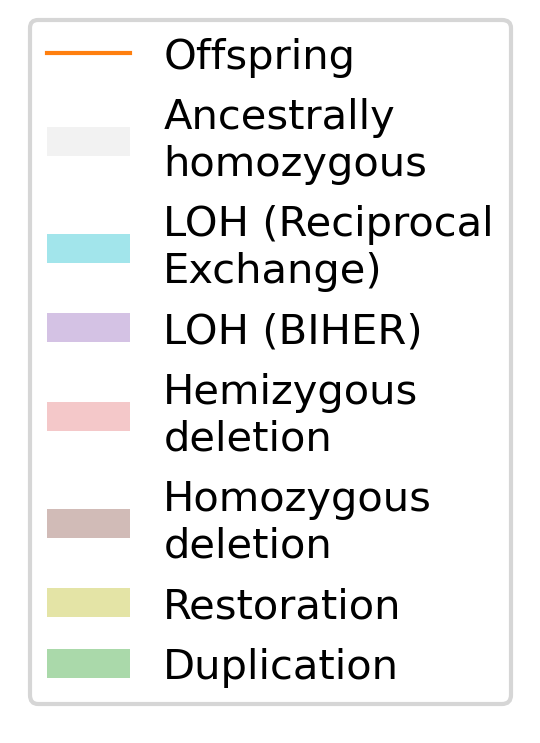

In [20]:
fig, ax = plt.subplots()

legend_elements = [
    Line2D([0],[0], lw=1.0, color=colors["endpoint"], label="Offspring"),
    #Line2D([0],[0], lw=1.0, color=colors["midpoint"], label="", visible=False),
    Patch(facecolor="black", alpha=0.05, label="Ancestrally\nhomozygous"),
    Patch(facecolor=colors["LOH"], alpha=0.4, label="LOH (Reciprocal\nExchange)"),
    Patch(facecolor=colors["BIHER"], alpha=0.4, label="LOH (BIHER)"),
    Patch(facecolor=colors["DEL"], alpha=0.25, label="Hemizygous\ndeletion"), # only red is lower alpha to avoid orange being invisible against red background
    Patch(facecolor=colors["HDE"], alpha=0.4, label="Homozygous\ndeletion"),
    Patch(facecolor=colors["RES"], alpha=0.4, label="Restoration"),
    Patch(facecolor=colors["DUP"], alpha=0.4, label="Duplication"),
]

fig.legend(handles=legend_elements, loc="upper center", fontsize=10, ncol=1)

ax.set_visible(False)

plt.show()